In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression_lib import *


file_path = r"C:\Users\Aditya Jain\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\WOC\Linear_regression\linear_regression_train.csv"
df = pd.read_csv(file_path)

print(df.head())
df.shape

   ID  Feature_1  Feature_2  Feature_3   Feature_4  Feature_5  Feature_6  \
0   1 -10.429837  21.684251  93.056324  128.914740   1.657315 -34.602633   
1   2  12.475081  11.652011 -47.621889  -21.892583 -25.844861 -46.951253   
2   3   7.696188  24.729547  43.782383  -53.282523 -69.145794 -57.072335   
3   4   6.505033  22.092605 -25.161422    4.742729 -20.344550 -50.248793   
4   5   5.906445  19.909180  24.705865  -51.875251 -24.857500 -25.879977   

    Feature_7   Feature_8   Feature_9  ...  Feature_17  Feature_18  \
0  -70.314374  -89.585318  -98.465642  ...  -99.322780   19.560135   
1 -114.500805  -96.257473 -138.354981  ...  -89.763107   -8.250307   
2 -114.149171 -105.408739  -71.892560  ...   -3.859655  -17.301240   
3  -89.324731 -104.002016 -160.103875  ...   48.557507   -1.997502   
4  -37.787560  -99.587673  -47.929647  ...    3.556973  -26.643253   

   Feature_19  Feature_20  Feature_21  Feature_22  Feature_23  Feature_24  \
0   25.568291  -40.876179 -116.146068  -82.18

(48000, 27)

TRAINING

In [2]:
df.head(10)

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367
5,6,-6.705940,17.285717,11.228360,-22.003871,-33.426409,-50.557009,-115.546686,-91.623443,-97.288813,...,-127.481255,60.250423,10.780333,-14.582924,-114.710822,-18.419053,-99.372781,-77.628845,27.234914,1514.257524
6,7,10.127642,18.855554,92.002934,8.958044,-33.184772,-37.351707,-69.815254,-87.671397,-85.127954,...,-41.841576,50.091017,19.919902,-15.442881,-92.192405,24.509213,-98.719969,20.077431,29.331134,6158.761390
7,8,-3.581303,22.961847,52.021685,-53.605500,-23.310877,-49.847391,-95.594884,-89.324833,-111.764670,...,-15.300284,34.340230,6.985084,-28.319734,-152.123534,-27.159077,-103.020575,-17.753933,-42.182246,65.794312
8,9,-10.873937,28.213741,63.504006,5.317177,-16.779461,-30.958073,-82.661112,-94.027843,-169.541589,...,-73.634914,17.401729,6.780610,-44.815840,-95.024467,-24.850915,-102.208350,1.041028,39.670422,-398.214246
9,10,17.280150,18.070293,40.894441,6.333974,-44.635707,-47.774155,-134.439751,-87.186261,-102.475635,...,-113.693370,-41.529865,-19.345166,-46.892483,-154.956370,-43.716668,-96.872030,-0.039124,-10.632835,-887.330060


In [3]:
data = df.to_numpy()

In [4]:
# load the dataset
x_train = np.delete(data, (26,0), axis=1)
y_train = data[:,26]

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (48000, 25)
The shape of y_train is:  (48000,)
Number of training examples (m): 48000


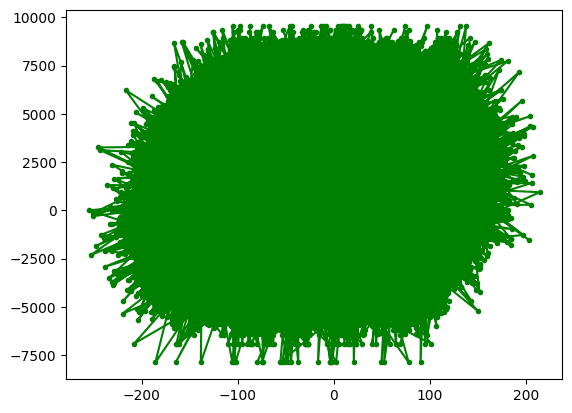

In [6]:
#rough 
plt.plot(x_train,y_train,'g.-')
plt.show()

In [7]:
# normalize the original features
x_norm , mean_train , sigma_train =z_score_normalization_train(x_train)
print(f"mean_train = {mean_train}, \nsigma = {sigma_train}")
print(f"Peak to Peak range by column in Raw_x:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized_x:{np.ptp(x_norm,axis=0)}")

mean_train = [  5.98216757  20.23480577  43.57326924 -21.89395621 -30.82121794
 -39.59033502 -89.5158562  -90.58278692 -95.10274371  58.82749388
 -33.75737294 -48.80469679 -72.21501673  97.95906386  45.37714497
 -30.21046175 -43.27055654   0.99929249   1.15340197 -33.11865985
 -90.45930275 -23.93663492 -98.39619842 -22.04435266  17.57734085], 
sigma = [ 9.6618349   5.72578895 43.45587562 39.80383536 15.32448382 16.58421424
 34.70887075 11.55854764 40.3514498  34.17735588 42.89064304 33.39406381
 30.7871623  12.64864994 16.46782913 19.34078952 47.16504752 33.57089672
 13.42497096 15.13171291 32.95129767 27.43953339  4.60959023 40.48207948
 42.04122071]
Peak to Peak range by column in Raw_x:[ 73.78546151  44.73675544 346.42548879 342.0671237  135.98301418
 142.41987234 316.08403363  99.24126015 317.17228938 312.19341458
 350.31971962 268.41659156 270.90492818 108.87414784 142.73504472
 171.10663661 391.05884954 270.7420612  106.42394612 123.64343007
 276.64183623 222.54207803  34.6270465

In [8]:
np.random.seed(1)
w = np.random.rand(x_train.shape[1])
b = np.random.rand()

In [9]:
w.shape

(25,)

In [10]:

# w = w.reshape(25,1)     # converting into 2D array
b = np.array(b)

In [11]:

print(f"w: {w}")
print(f"b: {b}")


w: [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01
 8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
 8.76389152e-01]
b: 0.8946066635038473


In [12]:
y_hat = predictor(x_norm[0],w,b)      #predicted value by our algorithm

In [13]:
y_hat

np.float64(0.1548452477056893)

In [14]:
compute_cost(x_norm,y_train,w,b)

np.float64(3099352.996749902)

In [15]:
compute_gradient(x_norm,y_train,w,b)

(array([-117.59234815,  -14.93077824, -517.83145094, -720.66154826,
          -2.54300717, -815.95402925, -449.12835295,   -9.99604358,
        -639.20319753, -230.37557978,   -3.8626377 ,   -7.78425325,
        -744.72726938, -654.23667976,    7.81432864, -521.36560444,
         -17.78854332, -453.92625724, -409.44858754, -688.96643393,
         -77.19077481,    9.87801225, -105.9933854 , -493.42626131,
           4.95743417]),
 np.float64(-1246.08413871465))

In [16]:
dj_dw, dj_db = compute_gradient(x_norm,y_train,w,b)

In [17]:
dj_dw.shape

(25,)

In [18]:
b.shape

()

In [19]:
dj_db.shape

()

In [21]:
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(x_norm ,y_train, w, b, compute_cost, compute_gradient, alpha, iterations)

Iteration 0: Cost 3039177.61
Iteration 1000: Cost 58027.41
Iteration 2000: Cost 58027.40
Iteration 3000: Cost 58027.40
Iteration 4000: Cost 58027.40
Iteration 5000: Cost 58027.40
Iteration 6000: Cost 58027.40
Iteration 7000: Cost 58027.40
Iteration 8000: Cost 58027.40
Iteration 9000: Cost 58027.40
Iteration 9999: Cost 58027.40


TESTING

In [23]:
file_path = r"C:\Users\Aditya Jain\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\WOC\Linear_regression\linear_regression_test.csv"

df = pd.read_csv(file_path)

print(df.head())
df.shape

   ID  Feature_1  Feature_2  Feature_3   Feature_4  Feature_5  Feature_6  \
0   1 -13.296650  26.947913  95.977811  -25.167831 -25.863389 -46.432548   
1   2  13.740478  26.632355  -1.056834  113.386950 -26.957189 -40.305571   
2   3   5.757701   5.729282  -7.846318    9.063737 -54.522411 -17.102457   
3   4  -0.365463  26.040174  15.941714  -47.019942 -32.029202 -34.080470   
4   5  -7.076549  13.958214  52.805040  -41.259861 -22.072337 -42.073960   

    Feature_7   Feature_8   Feature_9  ...  Feature_16  Feature_17  \
0  -30.120148  -99.220569  -95.771730  ...  -46.275616  -36.211021   
1   -8.916968  -99.182781  -65.653323  ...  -53.961100  -27.153987   
2  -89.391519  -81.827183 -104.007163  ...  -31.822475  -89.093319   
3 -105.277503 -104.742190 -135.598491  ...   -6.004513  -59.862724   
4  -42.290671  -91.763629  -18.252699  ...  -38.963648  -42.747877   

   Feature_18  Feature_19  Feature_20  Feature_21  Feature_22  Feature_23  \
0   46.588536   -1.146567  -55.504215  -70.99

(12000, 26)

In [24]:
df.head(10)

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,1,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,2,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,3,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,4,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,5,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917
5,6,3.005478,19.352975,18.522762,-21.106720,-7.810171,-68.748951,-106.904297,-61.464192,-69.937601,...,-42.904417,-64.641467,43.915943,1.659079,-36.796528,-90.382084,-21.904823,-101.001487,33.914447,22.508080
6,7,0.170168,12.497832,60.112250,-39.859751,-19.323083,-31.145326,23.378366,-96.375026,-100.871903,...,-28.777460,-25.217462,20.891708,3.609999,-30.950915,-149.788473,-45.378593,-99.091111,-60.854613,54.498862
7,8,8.473334,27.268675,69.419140,-41.551305,-30.796069,-31.972862,-64.985605,-100.001747,-66.302917,...,-17.615222,-1.123492,-11.299980,14.964044,-10.429868,-124.423573,-17.562700,-96.709223,-11.143226,24.015388
8,9,16.443679,15.428746,70.797101,-59.898964,-38.105308,-40.031534,-99.250162,-93.038974,-121.667462,...,-49.630800,-35.721336,-12.303166,-1.160943,-39.266484,-144.556376,-64.603146,-99.495465,-51.204171,39.369192
9,10,0.530395,23.851421,-43.764384,19.664813,-25.366404,-31.021129,-29.954438,-102.435790,-67.609802,...,-22.010641,-114.984753,-24.196974,-17.434472,-36.291301,-92.589271,-7.948650,-98.247104,-14.512075,58.050298


In [25]:
data = df.to_numpy()

In [26]:
# load the dataset
x_test = np.delete(data, (0), axis=1)
print ('The shape of x_test is:', x_test.shape)
print ('Number of testing examples (m):', len(x_test))

The shape of x_test is: (12000, 25)
Number of testing examples (m): 12000


In [27]:
#normalize the original features
print(f"mean_train = {mean_train}, \nsigma = {sigma_train}")
x_norm =z_score_normalization_test(x_test,mean_train,sigma_train)
print(f"Peak to Peak range by column in Raw_x:{np.ptp(x_test,axis=0)}")   
print(f"Peak to Peak range by column in Normalized_x:{np.ptp(x_norm,axis=0)}")

mean_train = [  5.98216757  20.23480577  43.57326924 -21.89395621 -30.82121794
 -39.59033502 -89.5158562  -90.58278692 -95.10274371  58.82749388
 -33.75737294 -48.80469679 -72.21501673  97.95906386  45.37714497
 -30.21046175 -43.27055654   0.99929249   1.15340197 -33.11865985
 -90.45930275 -23.93663492 -98.39619842 -22.04435266  17.57734085], 
sigma = [ 9.6618349   5.72578895 43.45587562 39.80383536 15.32448382 16.58421424
 34.70887075 11.55854764 40.3514498  34.17735588 42.89064304 33.39406381
 30.7871623  12.64864994 16.46782913 19.34078952 47.16504752 33.57089672
 13.42497096 15.13171291 32.95129767 27.43953339  4.60959023 40.48207948
 42.04122071]
Peak to Peak range by column in Raw_x:[ 76.93635348  40.21582867 341.22028456 324.57722878 124.10940798
 127.73779443 270.07867301  87.7415806  328.36981419 260.21832351
 349.79908206 277.45522877 226.41638272 100.08554047 123.97467917
 137.56852032 361.09291933 255.27557147  96.20935939 123.0507937
 258.31291225 210.7937375   34.84177254

In [28]:
x_trail = x_norm[(1,2,4),:]

In [29]:
predictor(x_trail, w, b)

array([4496.89101271, 4051.35608139,  745.42210295])